# TotalMarketValue Analysis

## Dataset Description:
The objective of this report is to perform an exploratory analysis of the “Total Market Value” variable in the context of Colombian soccer. Through the use of different graphical and statistical techniques, we seek to understand the factors that influence the market value of players, explore the distributions of the related variables, and detect possible anomalies or outliers that could be affecting the data. This analysis will serve as a basis for further research, such as the identification of players with growth potential or the prediction of the market value of Colombian soccer teams, which is the main objective of this project.

## Data Dictionary:

- `Total Market Value`: *Variable to be predicted* , it is the market value of the team in euros.



- `Club`: The name of the football team.

- `Squad`: Total amount of players registered in the team. It is important to evaluate the size of the team and the relation with the total market value. 

- `Foreigners`: Number of foreigners players on the team. It allows us to examine the team diversity and its dependency on international talent. 

- `titles obtained`: Amount of titles by the teams both, national and internationally. 

- `Market value` : The average unique market value of each player can be influenced by many factors such as age, recent performance, and demand in the transfer market. 

- `Average attendance` : Number of attendees at each team's stadiums, which can give an estimate of the amount of money coming in from attendance. 

In [2]:
# REPRESENTACIÓN, NORMALIZACIÓN Y LIMPIEZA DE DATOS 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
import statsmodels.api as sm


# Función para limpiar y convertir valores de mercado
def clean_market_value(column):
    # Eliminar el símbolo € si existe
    column_cleaned = column.str.replace('€', '', regex=False)
    
    # Convertir millones ('m') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('m', '')) * 1_000_000 if isinstance(x, str) and 'm' in x else x)
    
    # Convertir miles ('k') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('k', '')) * 1_000 if isinstance(x, str) and 'k' in x else x)
    
    # Convertir finalmente a numérico
    return pd.to_numeric(column_cleaned, errors='coerce')

# Leer todas las hojas del archivo Excel en un diccionario de DataFrames
sheets_dict = pd.read_excel(r'C:\Users\User\Downloads\BD_TotalMarketValue.xlsx',sheet_name=None, header=1)

# Crear un nuevo diccionario para almacenar las hojas modificadas
cleaned_sheets_dict = {}

# Iterar sobre cada hoja y realizar las operaciones necesarias
for sheet_name, df in sheets_dict.items():
    
    # Normalizar el nombre de las columnas
    df = df.rename(columns=lambda x: x.strip().lower())  # Elimina espacios en blanco y convierte a minúsculas

    # Eliminar la columna "unnamed: 0" si existe
    if 'unnamed: 0' in df.columns:
        df = df.drop(columns=['unnamed: 0'])

    # Limpiar las columnas 'total market value' y 'market value'
    if 'total market value' in df.columns:
        df['total market value'] = clean_market_value(df['total market value'])
    if 'market value' in df.columns:
        df['market value'] = clean_market_value(df['market value'])

    # Método fillna para imputar los valores NaN
    df.fillna({'total market value': df['total market value'].median(), 'market value': df['market value'].median()}, inplace=True)

    # Guardar el DataFrame modificado en el nuevo diccionario
    cleaned_sheets_dict[sheet_name] = df
    
    print(f"Hoja procesada: {sheet_name}")
    print(df)  
    df.isna().sum() 
    df.shape
    df.info()  
    

    


Hoja procesada: Año_2009
                          club  squad   age  foreigners  market value  \
0               Deportivo Cali     43  22.2           7      148000.0   
1            Atlético Nacional     37  23.6           6      161000.0   
2                    Junior FC     35  25.5           3      163000.0   
3               Millonarios FC     38  23.4           5       92000.0   
4                  Once Caldas     37  23.8           3       92000.0   
5            Deportivo Pereira     45  23.1           4       67000.0   
6                  Envigado FC     38  22.6           1       62000.0   
7             Cúcuta Deportivo     40  24.1           3       53000.0   
8           CD América de Cali     55  23.9           7       36000.0   
9       Independiente Medellín     47  21.0           6       27000.0   
10    CD La Equidad Seguros SA     40  23.3           6       30000.0   
11      Independiente Santa Fe     38  22.9           7       12000.0   
12             Boyacá Chic

## Exploratory data analysis EDA 

The objective of this instance is to perform an exploratory analysis of the “Total Market Value” variable in the context of Colombian soccer. Through the use of different graphical and statistical techniques, we seek to understand the factors that influence the market value of players, explore the distributions of the related variables, and detect possible anomalies or outliers that could be affecting the data. This analysis will serve as a basis for further research, such as the identification of players with growth potential or the prediction of the market value of Colombian soccer teams. 

In [3]:
# Crear una lista vacía para almacenar los DataFrames
combined_data = []

# Recorrer las hojas y añadir una columna de 'año'
for sheet_name, df in cleaned_sheets_dict.items():
    # Extraer el año del nombre de la hoja
    year = sheet_name.split('_')[-1]
    
    # Añadir la columna 'year' al DataFrame
    df['year'] = int(year)
    
    # Añadir el DataFrame a la lista
    combined_data.append(df)

# Combinar todos los DataFrames en uno solo
df_combined = pd.concat(combined_data, ignore_index=True)




This first step will allow us to work in a better way bringing the dictionary we have been working with where the name of the sheet acting as the key and the dataframe acting as the value. The idea is to extract the year from the sheets to create a new year column and add it to the dataframe with the other data, then add it to the empty list that was initially created to have at the end a single dataframe with which we will work throughout the analysis. 



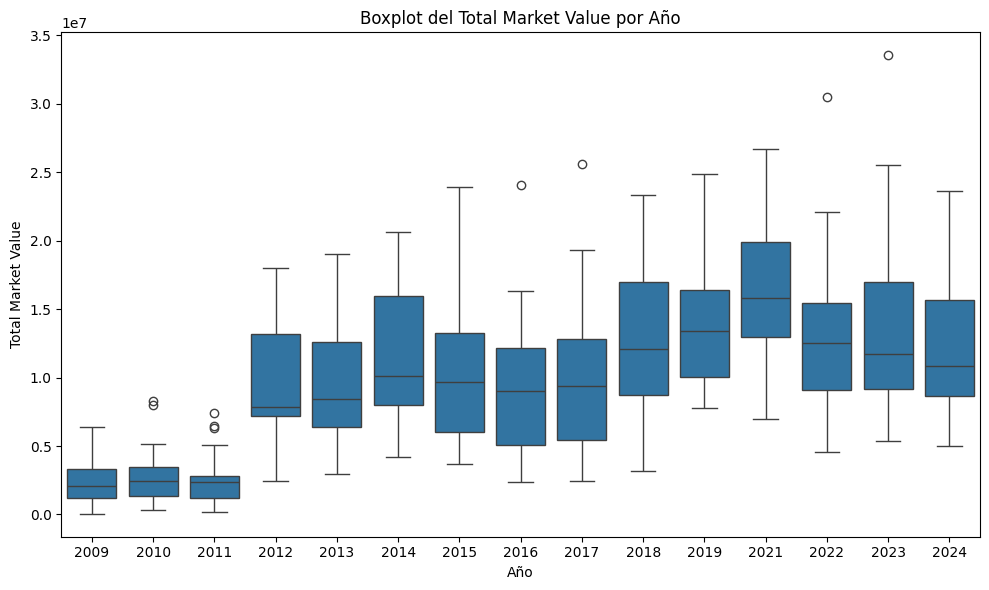

In [4]:

# Boxplot del total market value por año

plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='total market value', data=df_combined)
plt.title('Boxplot del Total Market Value por Año')
plt.xlabel('Año')
plt.ylabel('Total Market Value')
plt.tight_layout()

## FINDINGS

`Median`: 

    The median for each year is represented by the line inside each box. Broadly speaking: 
    
    - In the early years (2009-2011), the median of total market value is low, but starting in 2012, it starts to grow gradually.
    
    -Starting in 2016, the median fluctuates, reaching higher peaks in 2017 and 2023.
    
    - The increase in the median between 2009 and 2024 suggests a general trend of growth in total market value over the years, with some fluctuations.

`Interquartile Range (IQR)`: 

    
    - In the early years (2009-2011), the IQR is quite small, suggesting little variability in team market values.

    - Beginning in 2012, the IQR increases noticeably, indicating a greater dispersion in market values. This may reflect that some teams are growing significantly in value, while others are not.

    - The year 2024 shows a wider dispersion compared to the early years, indicating greater variability among team values.

` Outliers`: 

    -   The points outside the boxes are outliers, representing teams whose market value is exceptionally high or low compared to the rest of the teams in a specific year.
    
    -   In the years 2010 and 2011, there are two high outliers, meaning that some teams had significantly higher market values ​​than the rest. These teams are Deportivo Cali, who had incorporated players such as Faryd Mondragón, Álvaro Domínguez, Sergio Leal and Vladimir Marín into their ranks, whose market value exceeded one million euros for that year. The other team, Atlético Nacional, had players such as Macnelly Torres in its ranks, exceeding 2 million euros, and players such as Luis Fernando Mosquera, Johan Fano, Jherson Córdoba and Dorlan Pabón, exceeding one million euros.

    
    -   From 2016 onwards, others high atypical values ​​began to appear, indicating that some teams stand out with a market value much  higher than the average. This is especially seen in the years 2016 with Atlético Nacional, where there were players such as Alexis Henriquez, Sebastián Perez and Macnelly Torres with values ​​of 1M€, and players such as Victor Ibarbo, whose value for that year was 8.50M€. In 2017, it was DIM who had players like Juan Fernando Quintero with a market value of €10M and Valentín Viola, the most valued of that squad. By 2022, Atlético Junior had around 10 players who had a market value above one million Euros, to that added players like Miguel Borja with €3.20M and Carlos Bacca with €2.00M who increased the total market value of the team. Finally, in 2023, Atlético Junior would incorporate into its ranks Juan Fernando Quintero with a market value of €6.00M, Deiber Caicedo with €3.00M, added to that around 7 players with values ​​above €1M.

` Bigotes (moustaches)` :

   
    - Overall, the whiskers show that, starting in 2012, the range of total market values ​​has grown at both the bottom and top, reflecting an increase in the dispersion of values.
    
    - In more recent years (2020-2024), the whiskers are longer, indicating greater variability in team values.


`General trend` :

    -  Growth: From 2009 to 2024, there appears to be an upward trend in Total Market Value, especially starting in 2012. This growth may reflect an increase in investments, better football players, or better financial management in the Colombian .
    
    - Variability: Starting in 2012, the variability in market values ​​between teams increases, suggesting a growing gap between teams with greater resources and teams with fewer. Some teams grow a lot in value, while others remain at a lower level.
    
    - Significant outliers: In recent years, some teams have significantly outperformed in terms of market value, especially Atlético Junior in 2023, which could be due to factors such as expensive signings, sporting successes or important commercial agreements. From 2009 to 2024, the Colombian team that has had the highest market value is Atlético Junior with a value of €30.48M


Text(0, 0.5, 'Total Market Value Promedio')

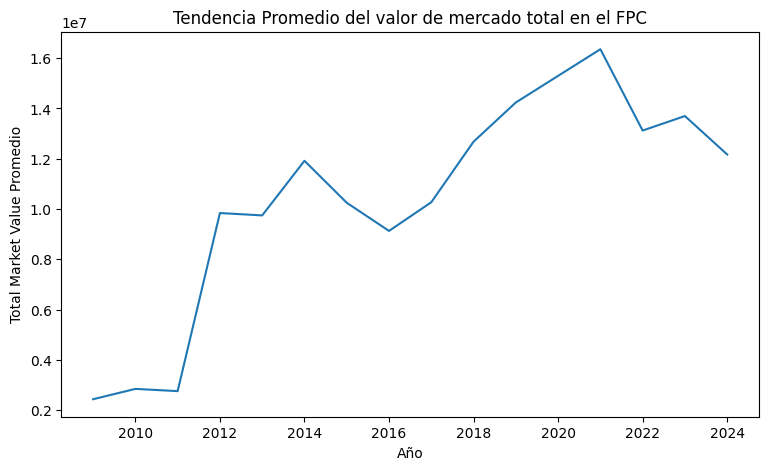

In [19]:
# Agrupamos por año para calcular posteriormente el lineplot
df_grouped = df_combined.groupby('year')['total market value'].mean().reset_index()

# Line plot de la tendencia global del total market value
plt.figure(figsize=(9,5))
sns.lineplot(x='year', y='total market value', data=df_grouped)
plt.title('Tendencia Promedio del valor de mercado total en el FPC') 
plt.xlabel('Año')
plt.ylabel('Total Market Value Promedio') 

## FINDINGS

- Identifying the general trend:

    - The line shows a general upward trend from 2009 to 2021, followed by a drop in 2022 and a slight recovery in 2023, with a further drop in 2024.

    - The sustained increase suggests that the average market value of teams in Colombia has grown in most of these years, with    fluctuations.
     
     ## Analysis of key periods:

- `2009 - 2011`: During these first years, the average market value is relatively low and stable, staying around 0.2 - 0.3 million euros. This could indicate a period in which Colombian clubs had a lower value in terms of players and football assets.

- `2012 - 2014`: From 2012 onwards, there is a notable increase, with a significant jump in the average value. This could reflect the new appreciation of players or the signing of more valuable players, greater investment in clubs or an improvement in the competitiveness of Colombian football at an international level. Indeed, between in 2014 and 2015 the Colombian league was among the top 10 leagues in the world. 

- `2015 - 2017`: After a peak in 2014, a small drop is observed followed by oscillating behaviour. These movements could be due to fluctuations in player transfers, the quality of the squads or even external economic factors that impacted the value of the clubs.

- `2018 - 2021`: This is where the growth is most pronounced, reaching its maximum in 2021. In this period, the average value seems to have reached an all-time high, exceeding 160 million euros. This growth could be linked to:
    - Increase in the international visibility of Colombian teams.
    - Highlighted participations in international tournaments (Copa Libertadores, Sudamericana).
    - Improvements in infrastructure or in scouting and player training systems.

- `2022 - 2024`: Starting in 2022, the average value starts to decrease. The drop in 2022 is quite pronounced, but the value    remains    higher compared to the first years. Although there is a slight recovery in 2023, it falls again in 2024. This could be 
    associated with:
    
    - Possible effects of the COVID-19 pandemic, which may have impacted the transfer market.

    - Departure of important players to foreign leagues.

    - Reduction of investment by clubs or changes in the economy of Colombian football.



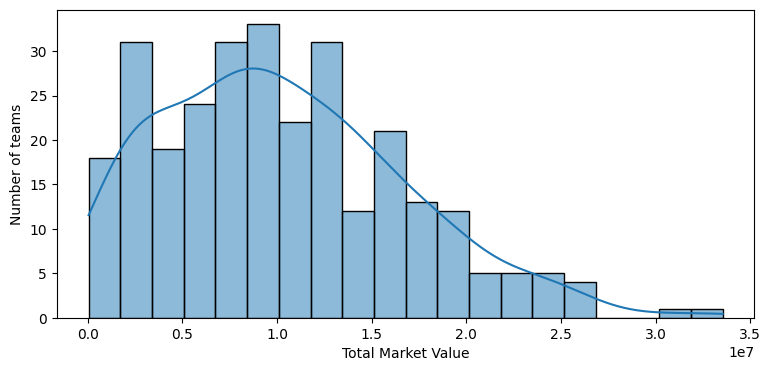

Asimetría de Fisher (Skewness) Global: 0.6118545223260476


In [14]:
# Histogram with KDE

plt.figure(figsize=(9,4))
sns.histplot(df_combined['total market value'], bins=20, kde=True)
plt.xlabel('Total Market Value')
plt.ylabel('Number of teams')


# Cálculo de la asimetría de Fisher (Skewness) para los datos completos
fisher_skewness_global = skew(df_combined['total market value'])

plt.show()
print(f"Asimetría de Fisher (Skewness) Global: {fisher_skewness_global}")



## FINDINGS

`Asymmetric Distribution (Right Skew)`:

    For better data accuracy and interpretation, the Fisher skewness coefficient was calculated using the Scipy module by importing the skew function, giving a value of: 0.61185. This coefficient indicates that the distribution of market values ​​in the histogram is slightly skewed to the right. Therefore: This means that most football teams have market values ​​that are concentrated in the low range, i.e. between 0.0 and 1.5 million euros. Few teams have high market values, as seen in the 2.5 to 3.5 million euro bins, where the bars are significantly smaller.

`Concentration of teams` :

    Most teams are concentrated between 0.5 and 1.5 million euros, as indicated by the higher height of the bars in that range. This reinforces the idea that Colombian professional football has a large number of teams with more modest market values, while only a few clubs have a significantly higher market value.

`Exceptional teams`:

    The final section of the histogram, which includes market values ​​greater than 2.5 million euros, shows that there are very few teams that reach those values, which probably includes the most successful and popular teams in the country (such as Atlético Nacional, Deportivo Cali, Junior and DIM).

`KDE (Kernel Density Estimation)` :

    The smoothed curve (KDE) shows a continuous distribution that reflects the shape of the data and confirms that most teams are within the low range of market values, with an abrupt decrease in density towards the teams with the highest market value.

## ANALYSIS OF PREDICTOR VARIABLES

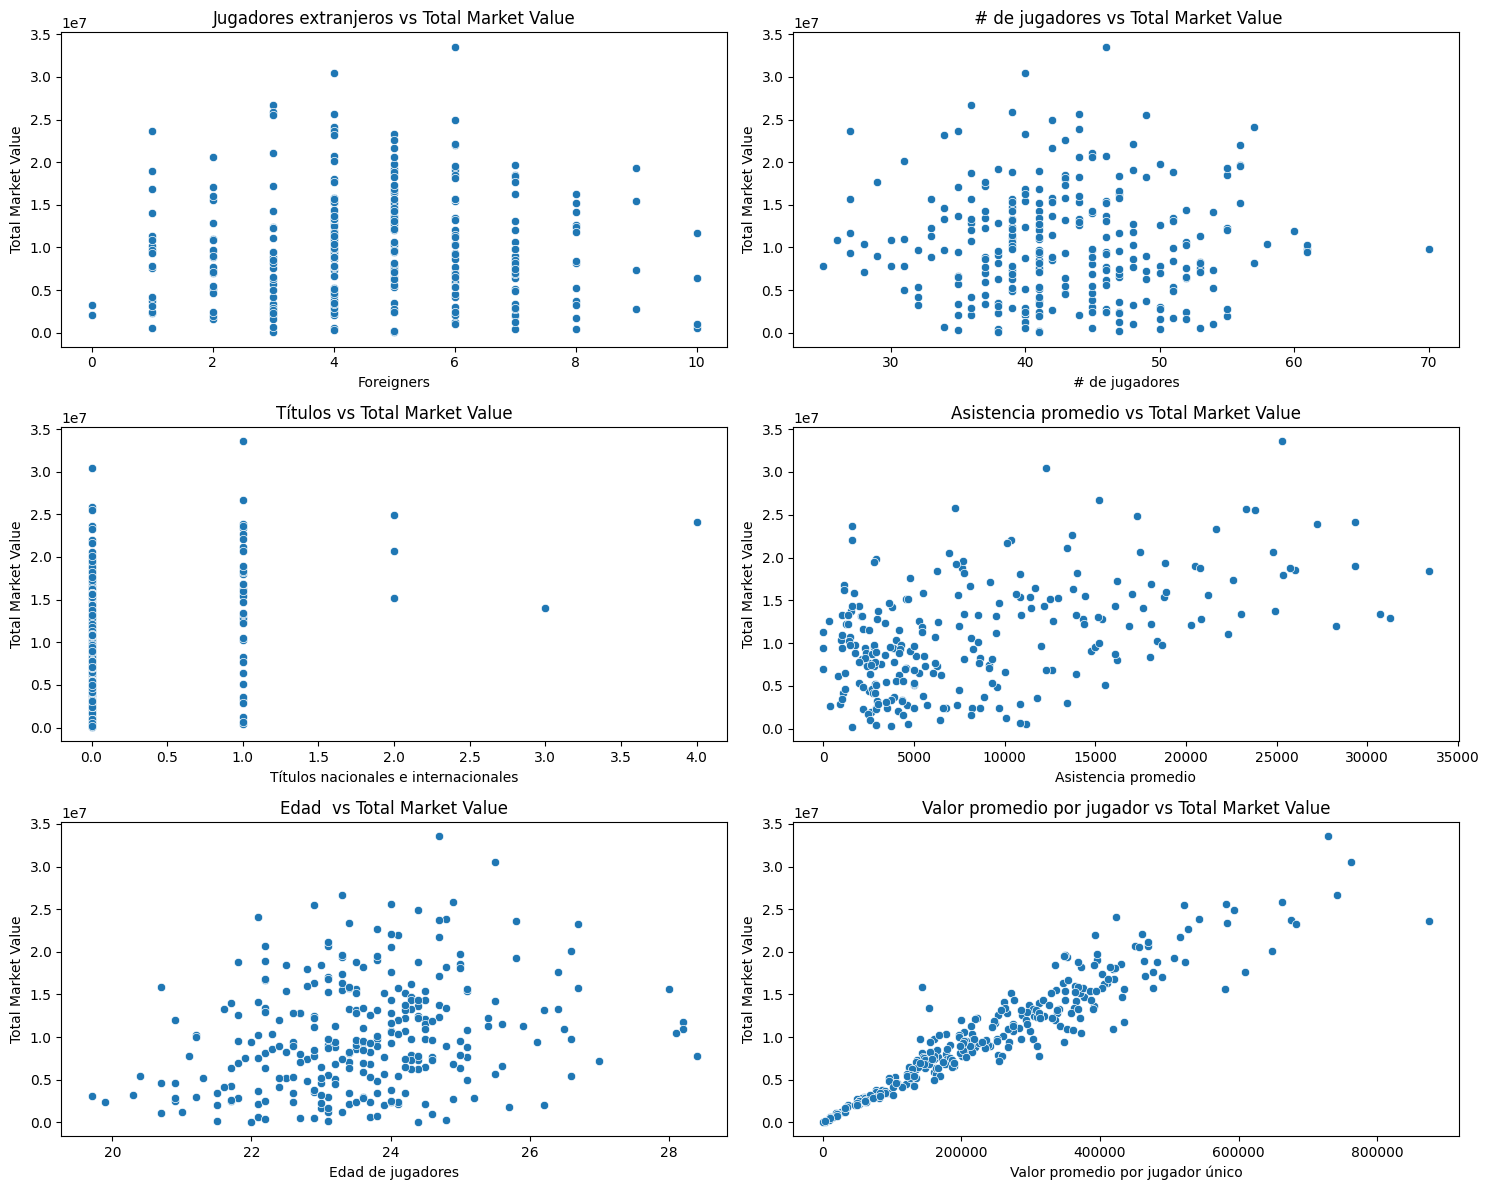

In [20]:

# Crear una figura con un arreglo de 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(15, 12))


# Subplot 1 Gráfico de dispersión entre Foreigners y total market value
sns.scatterplot(x='foreigners', y='total market value', data=df_combined, ax=axes[0, 0])
axes[0, 0].set_title('Jugadores extranjeros vs Total Market Value')
axes[0, 0].set_xlabel('Foreigners')
axes[0, 0].set_ylabel('Total Market Value')


# Subplot 2 Gráfico de dispersión entre Squad (número de jugadores) y total market value
sns.scatterplot(x='squad', y='total market value', data=df_combined, ax=axes[0, 1])
axes[0, 1].set_title(' # de jugadores vs Total Market Value')
axes[0, 1].set_xlabel('# de jugadores')
axes[0, 1].set_ylabel('Total Market Value')


# Subplot 3 Gráfico de dispersión entre cantidad de títulos y total market value 
sns.scatterplot(x='titulos', y='total market value', data=df_combined, ax=axes[1, 0])
axes[1, 0].set_title('Títulos vs Total Market Value')
axes[1, 0].set_xlabel('Títulos nacionales e internacionales')
axes[1, 0].set_ylabel('Total Market Value')


#Subplot # 4 Gráfico de dispersión entre asistencia promedio a los estadios y total market value 
sns.scatterplot(x='promedio asistencia', y='total market value', data=df_combined, ax=axes[1, 1])
axes[1, 1].set_title('Asistencia promedio vs Total Market Value')
axes[1, 1].set_xlabel('Asistencia promedio')
axes[1, 1].set_ylabel('Total Market Value')


# Subplot 5: Gráfico de dispersión entre edad promedio de jugadores y total market value
sns.scatterplot(x='age', y='total market value', data=df_combined, ax=axes[2, 0])
axes[2, 0].set_title('Edad  vs Total Market Value')
axes[2, 0].set_xlabel('Edad de jugadores')
axes[2, 0].set_ylabel('Total Market Value')

# Subplot 6: Gráfico de dispersión entre valor promedio de cada jugador y valor de total market value 
sns.scatterplot(x= 'market value', y ='total market value', data=df_combined, ax=axes[2,1])
axes[2, 1].set_title('Valor promedio por jugador vs Total Market Value')
axes[2, 1].set_xlabel('Valor promedio por jugador único')
axes[2, 1].set_ylabel('Total Market Value')



# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show() 






## FINDINGS

1. `Foreign players vs Total market value`

    Observation: The graph shows that the number of foreign players has no clear relationship with the total market value. There is a considerable dispersion in the total market value, regardless of the number of foreigners in the team.

    Interpretation: This suggests that having more foreign players does not necessarily increase the total value of the team. There may be teams that have a low number of foreigners but still have a high total market value, possibly due to the quality of the players, their experience or the impact on the league.

2. `Numbers of players vs Total market value`

    Observation: Similar to the graph above, there does not seem to be a direct relationship between the number of players on a team and its total market value. The dispersion is wide, with some teams having a high market value with fewer players and others with many more players.

    Interpretation: This suggests that the number of players on a team is not the only factor determining its value. Player quality, level of competition, and club strategy can have a bigger influence on the total value of the team than simply the number of squad members.

3. `Titles vs Total Market Value`
    
    Observation: In this chart, we can see a clear clustering of the data. Teams with more titles do not necessarily have a high total market value. Most teams seem to be concentrated in the 0-2 titles range, regardless of value.

    Interpretation: This could indicate that success in terms of titles does not always translate into higher market value. Some teams may have been successful in the competition without needing significant investments, which may be reflected in a relatively low market value.

4. `Average Attendance vs Total Market Value`

    Observation: Here we can see a trend that as average attendance increases, so does total market value. Although the relationship is not perfectly linear, there is an increasing trend.

    Interpretation: This suggests that match attendance could be correlated with team value. Teams that generate more gate revenue and have a strong fan base may have a higher market value, possibly due to their ability to invest in players and other resources.

5. `Age average vs Total market value` 
    
    Observation: Although the graph seems to show a slight trend to the right, just like the previous one, this chart does not shows a clear relation between age an total market value. 

    Interpretation: The age of the players does not seem to be a significant variable, which indicates that there may be teams with very young players or with advanced ages which would not have a direct impact on the market value of the teams.

6. ` Average market value per player vs Total market value`   
    
    Observation: The scatter plot between the average value per player and the total market value shows a fairly clear positive relationship. We can see that as the average value per player increases, the overall team value also increases.

    Interpretation: 

    -   Positive correlation: as the average value per player increases, the overall team value also increases. This suggests that  teams with players of higher individual value tend to have a higher overall market value. This behavior is to be expected, as teams with more expensive players generally have a higher market value.

    - Density of points at low values: You notice that there are many teams clustered at the bottom left of the graph, suggesting that there are several teams with low to moderate average player value, but whose overall values also tend to be lower. This could be related to teams that do not have many stars or that operate on more limited budgets.

    -  Some teams stand out: Towards the top right of the chart, there are some points that stand out from the rest, indicating    that  there are teams with individually very valuable players and, as a result, have a high total market value. These teams    are likely to invest more in high-cost signings or have star players.


    - Fairly even distribution: There do not appear to be many exceptions or drastic outliers, indicating that the relationship     between average player value and total team value is relatively even.

    



## Linear regression model

# Description 

    After doing an exploratory analysis of the data that would allow us to have a more detailed understanding of the data, we will proceed using the simple linear regression model using 'market value' as a predictor variable, which is basically the average market value per player in a squad and also the year to make a prediction in the future. The decision comes because according to the visualizations made previously there seems to be a positive trend between this variable 'market value' and the variable 'total market value'. However, the first thing we will do is to calculate its correlation coefficient and continue analyzing if it is a good predictor variable. 



Coeficiente de correlación de Pearson: 0.9423736257232094


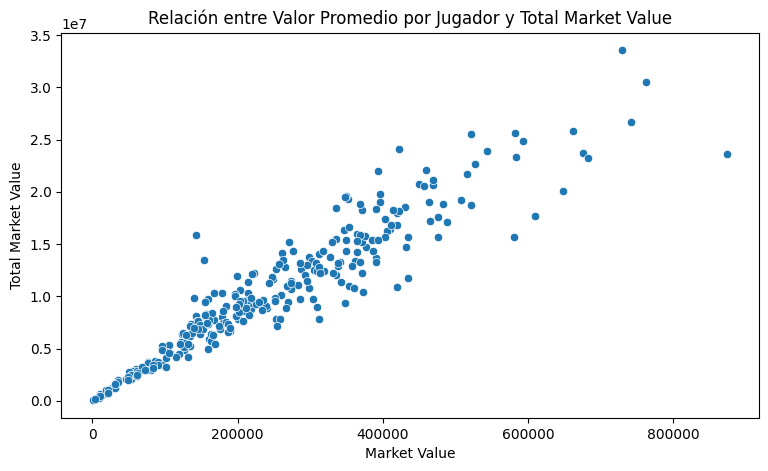

In [23]:

# Calcular el coeficiente de correlación de Pearson entre market value y total market value
correlation = df_combined['market value'].corr(df_combined['total market value'])
print(f"Coeficiente de correlación de Pearson: {correlation}")

plt.figure(figsize=(9,5))
sns.scatterplot(x='market value', y='total market value', data=df_combined)
plt.title('Relación entre Valor Promedio por Jugador y Total Market Value')
plt.xlabel('Market Value')
plt.ylabel('Total Market Value')
plt.show()


# Pearson Correlation 

    As we mentioned before, we noticed a strong positive tendency between the 'market value' variable and 'total market value' variable, After the calculation we noticed that the correlation is 0.9423 >> 94,23%, which suggests and confirms a strong correlation and indicates it could be a good predictor variable. 

    However, we observe that the data have a skewed distribution (e.g., some very high values), then it may be useful to apply a logarithmic transformation to the variables. This can help to normalize the data and improve the fit of the model.

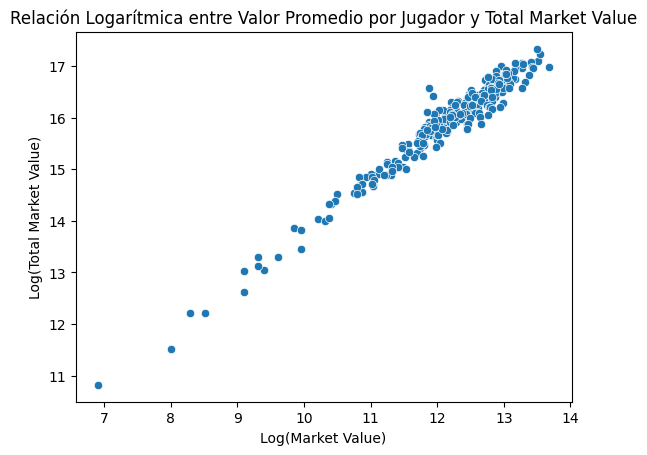

In [24]:


# Crear las columnas logarítmicas
df_combined['log_market_value'] = np.log(df_combined['market value'])
df_combined['log_total_market_value'] = np.log(df_combined['total market value'])



# Verificar la nueva distribución
sns.scatterplot(x='log_market_value', y='log_total_market_value', data=df_combined)
plt.title('Relación Logarítmica entre Valor Promedio por Jugador y Total Market Value')
plt.xlabel('Log(Market Value)')
plt.ylabel('Log(Total Market Value)')
plt.show()




# FINDINGS

    - By applying the logarithmic transformation, I transformed this nonlinear relationship into an approximately linear relationship, which facilitates the use of linear regression models. The resulting plot shows a much clearer alignment of the points on a line, indicating that the data now better meet the assumptions of simple linear regression.
    
___________________________________________________________________________________________________________________________________________________________    

In [25]:
# Aplicamos el modelo para ver el resumen de la regresión

X = df_combined[['log_market_value', 'year']]
X = sm.add_constant(X)  # Para agregar la constante
y = df_combined['log_total_market_value']

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

print(model.summary())  







                              OLS Regression Results                              
Dep. Variable:     log_total_market_value   R-squared:                       0.966
Model:                                OLS   Adj. R-squared:                  0.966
Method:                     Least Squares   F-statistic:                     4050.
Date:                    Wed, 16 Oct 2024   Prob (F-statistic):          5.17e-210
Time:                            16:09:34   Log-Likelihood:                 87.349
No. Observations:                     288   AIC:                            -168.7
Df Residuals:                         285   BIC:                            -157.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


# Preliminary model conclusions

1. Model Summary

    `Dependent Variable`: log_total_market_value
    `Independent Variable`: log_market_value
    `Number of Observations`: 288

2. Model Statistics
    
    `R-squared (R²)` : 0.965

    -   This indicates that 96.5% of the variation in total market value (on a log scale) can be explained by the log average value per player variable. This is a very high value, suggesting that the model fits the data very well.
    
    - `Adjusted R-squared`: 0.965

        This statistic adjusts the R² as a function of the number of variables in the model. A value close to 1 implies that the model is good.

    - `F-statistic`: 7860

        This statistic is used to test the joint hypothesis that all regression coefficients are zero. Such a high value indicates that at least one independent variable is significant in the model.
    
    - `Prob (F-statistic)`: 4.76e-210
    
        This indicates that the probability of observing such an extreme value of the F-statistic under the null hypothesis is practically zero, suggesting that the model is significant.
    
3. Model coefficient 
    
   - `Intercept (const)`: 4.1976

        This value represents the logarithm of the total market value when the logarithm of the average value per player is zero.
    
    - `Coefficient of log_market_value`: 0.9629

        This means that a 1% increase in average value per player is associated with a 0.9629% increase in total market value, indicating a positive and significant relationship.

    - `Standard Errors`: 
    
        The standard errors of the coefficients are small, suggesting that the estimates are precise.

    - `t and p-values`: 
    
        Both coefficients (constant and log_market_value) have high t-values and p-values of 0.000, indicating that  they are significantly different from zero.

4. Model Diagnostics
    
    - `Omnibus` : 33.407, `Prob(Omnibus)`: 0.000.

        This suggests that the residuals are not normally distributed, which could be an area of concern.

    - `Durbin-Watson`: 1.354.

        This statistic is used to detect autocorrelation in the regression residuals. A value close to 2 indicates that there is no autocorrelation; however, there is some concern here because the value is below 2.
    
    - `Kurtosis`: 5.818

        Indicates that the residuals have heavier tails than the normal distribution, which may be a sign of fit problems.
    


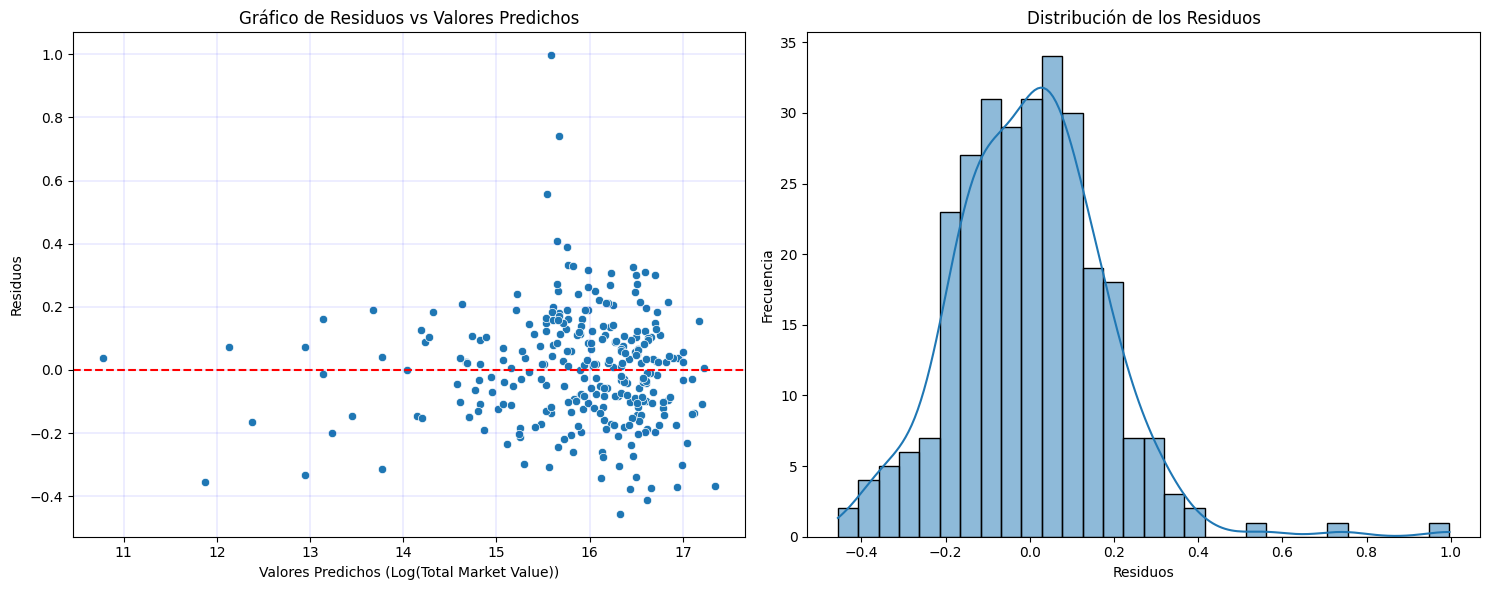

In [31]:
# Obtener los valores predichos y los residuos del modelo
y_pred = model.predict(X)
residuos = y - y_pred

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila y 2 columnas

# 1. Gráfico de residuos vs valores predichos
sns.scatterplot(x=y_pred, y=residuos, ax=axs[0])
axs[0].axhline(0, color='red', linestyle='--')  # Línea horizontal en 0
axs[0].set_title('Gráfico de Residuos vs Valores Predichos')
axs[0].set_xlabel('Valores Predichos (Log(Total Market Value))')
axs[0].set_ylabel('Residuos')
axs[0].grid(True, color='blue', linestyle='-', linewidth=0.1)  # Agregar cuadrícula

# 2. Histograma de los residuos
sns.histplot(residuos, kde=True, bins=30, ax=axs[1])  # Usar el segundo subplot
axs[1].set_title('Distribución de los Residuos')
axs[1].set_xlabel('Residuos')
axs[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el layout
plt.show()

# Conclusions

1. `Graph of Residuals vs. Predicted Values:`
    
    Interpretation: This plot shows the relationship between predicted values (x-axis) and residuals (y-axis). Ideally, if the model meets the homoscedasticity assumption (equal variance of the residuals across all predictions), we should observe a random distribution of the residuals around the red line (representing a residual of 0) with no discernible pattern.
    Analysis: In this plot, some increasing dispersion can be observed as the predicted values increase (in the range of 16 to 17 in log(Total Market Value)). This suggests that the residuals have greater variance as the predicted values increase, indicating that the homoscedasticity assumption is not met, and the model exhibits heteroscedasticity.

2. `Histogram of the Residuals:`
    
    Interpretation: The histogram of the residuals shows the distribution of the residuals. Under the assumption of normality of the errors, this plot should have an approximately normal shape (Gaussian bell).
    Analysis: The histogram shows a distribution that is nearly symmetric, but with a slight right tail (larger positive residuals) and an accumulation of values around zero. Despite approaching normality, the residuals farther from zero are indicative of a slight violation of the normality assumption. However, the degree of deviation does not appear severe.

`Conclusion:`

Homoscedasticity vs Heteroscedasticity: According to the plot of residuals vs predicted values, the model shows signs of heteroscedasticity, especially at higher predicted values. This means that the variance of the errors is not constant, which could affect the precision of the standard estimates of the model.

Normality of the Residuals: The histogram suggests that the residuals follow an approximately normal distribution, although there is a slight skewness. This means that, although not a serious violation of the normality assumption, the model could benefit from additional adjustments (such as transformation of variables or use of robust models).




In [24]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Realizamos la regresión como antes
X = df_combined[['log_market_value', 'year']]
X = sm.add_constant(X)  # Agregar la constante
y = df_combined['log_total_market_value']

# Ajustamos el modelo OLS
model = sm.OLS(y, X).fit()

# Realizamos la prueba de Breusch-Pagan
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Resultados de la prueba
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, test))


[('LM Statistic', 14.954014427868689), ('LM Test p-value', 0.0005659486467877191), ('F-Statistic', 7.804352265081552), ('F-Test p-value', 0.0005013850601557839)]


`LM Statistic (14.95):`

    In this case, the obtained value (14.95) is high enough to suspect that the residuals do not have a constant variance, which means that the model may not meet the homoscedasticity assumption.

`F-Statistic (7.80):`

An F-value of 7.80 is high in this context, suggesting that the variability in the residuals is being significantly affected by the explanatory variables, and thus is an indication of heteroscedasticity.

`Interpretation of the p-values:`

Both LM Test p-value (0.00057) and F-Test p-value (0.00050) are significantly less than 0.05, which means that we can reject the null hypothesis of homoscedasticity.



## OVERVIEW CONCLUSIONS

- This Total Market Value data analysis project involved a comprehensive process ranging from data collection to the application of advanced modeling techniques. First, data was extracted from Transfermarkt, cleaned and normalized to ensure quality and consistency. Subsequently, exploratory data analysis (EDA) was performed to identify initial patterns and log transformations were applied in order to better fit the regression model.

- During the modeling phase, a multiple linear regression was used to evaluate the relationship between the average market value per player and the total market value of the teams. However, the residual analysis and the Breusch-Pagan heteroscedasticity test revealed that the model presents significant heteroscedasticity, which affects the consistency and efficiency of the estimators. Since this prevents us from moving forward with reliable predictions, it was decided to conclude the project at this stage, highlighting the value of the previous findings and the limits imposed by the data conditions.

- This project provides a solid overview of market value analysis in soccer, but also underscores the importance of carefully considering the quality of predictive models when underlying assumptions, such as homoscedasticity, are not met. 



## STEPS TO FOLLOW 

For future steps, here are some potential approaches i have considered to address the challenges posed by heteroscedasticity and further refine the model: 

-   Transform the Data Further: Experiment with other data transformations beyond logarithmic scaling, such as square root or Box-Cox transformations. These might help stabilize the variance and address heteroscedasticity.

-   Weighted Least Squares (WLS): In cases of heteroscedasticity, using Weighted Least Squares (WLS) instead of Ordinary Least Squares (OLS) can give more reliable estimates by assigning weights to minimize the impact of variance differences. 

-   Explore Non-Linear Models: If heteroscedasticity persists, non-linear regression models or polynomial regression may offer better fitting and prediction, especially if the relationship between variables isn't strictly linear. 

-      Robust Regression: Another option is to apply robust regression techniques, which are less sensitive to heteroscedasticity and outliers, providing more reliable coefficient estimates under those conditions.

-   Machine Learning Models: To improve prediction accuracy, I could explore machine learning models like Random Forests or Gradient Boosting, which are more flexible and capable of capturing non-linear relationships and complex patterns in the data without strict assumptions on variance.



# Bibliography 


- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Retrieved from https://www.statlearning.com/

- Transfermarkt. (2024). Liga Dimayor Apertura market values. Retrieved from https://www.transfermarkt.com/liga-dimayor-apertura/marktwerteverein/wettbewerb/COLP/stichtag/2024-10-01
